In [51]:
import pandas as pd
import numpy as np
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
import seaborn as sns

In [52]:
con = sqlite3.connect('testing_data.db')

In [53]:
df = pd.read_sql_query("SELECT * from StressData", con)

In [167]:
df.head(10)

,id,state,data,datetime,hr,stdnn,dfa,ent
0,1b1,Base,"333,335,335,337,337,339,340,340,342,343,343,34...",February28030415,0.000000,0.000000,1.276592,0.682245
1,1b2,Base,"352,352,351,351,350,349,349,348,349,348,347,34...",February28030451,71.921749,98.260584,1.317828,0.271648
2,2b1,Base,"323,322,322,322,322,321,321,320,319,319,317,31...",February28030549,86.555107,109.252735,1.134368,0.158609
3,2b2,Base,"290,290,289,289,289,288,287,286,286,284,283,28...",February28030623,75.921909,74.813510,1.099185,0.181347
4,2s1,Stress,"323,324,324,324,324,324,324,323,323,324,323,32...",February28031944,92.429577,50.883888,1.086926,0.296164
5,1s1,Stress,"366,364,365,366,365,365,366,366,365,364,365,36...",February28032738,87.833442,66.926899,1.221712,0.400652
6,2s2,Stress,"298,298,297,297,297,297,295,296,297,296,296,29...",February28033331,74.094402,53.136674,1.181261,0.136802
7,1s2,Stress,"395,396,396,396,396,396,396,395,394,393,392,39...",February28033434,72.125292,120.093243,1.373048,0.212617
8,3b1,Base,"320,320,321,322,323,323,324,324,324,325,325,32...",February28033627,101.132686,28.221297,0.836608,0.313789
9,3b2,Base,"331,330,329,329,328,328,327,327,327,326,325,32...",February28033701,104.379861,32.624246,0.798811,0.376371


In [169]:
df[5:15]

,id,state,data,datetime,hr,stdnn,dfa,ent
5,1s1,Stress,"366,364,365,366,365,365,366,366,365,364,365,36...",February28032738,87.833442,66.926899,1.221712,0.400652
6,2s2,Stress,"298,298,297,297,297,297,295,296,297,296,296,29...",February28033331,74.094402,53.136674,1.181261,0.136802
7,1s2,Stress,"395,396,396,396,396,396,396,395,394,393,392,39...",February28033434,72.125292,120.093243,1.373048,0.212617
8,3b1,Base,"320,320,321,322,323,323,324,324,324,325,325,32...",February28033627,101.132686,28.221297,0.836608,0.313789
9,3b2,Base,"331,330,329,329,328,328,327,327,327,326,325,32...",February28033701,104.379861,32.624246,0.798811,0.376371
10,4b1,Base,"318,316,317,316,315,315,315,315,316,316,317,31...",February28033757,95.296026,38.944889,0.973744,0.364942
11,4b2,Base,"280,282,285,289,293,297,303,309,315,322,329,33...",February28033831,93.129977,68.410028,0.994207,0.241297
12,3s1,Stress,"300,299,299,299,299,300,300,299,299,300,302,30...",February28034816,106.826122,25.576333,0.915490,0.217025
13,4s1,Stress,"293,293,293,293,293,293,293,293,294,295,295,29...",February28035339,105.248954,47.688027,0.915808,0.164247
14,4s2,Stress,"332,332,331,331,331,331,330,329,329,330,329,32...",February28035918,84.410646,39.509040,1.082714,0.863123


In [55]:
nums = [x for x in range(24)]
rem = [0, 5, 3, 13, 15, 16, 17, 19, 21, 22, 10, 6,1]

nums = [x for x in nums if not x in rem]
# remove 5, 15, 16, 17
labels = ['b1', 'b2', 's1', 's2']
ids = [str(n) + lab for n in nums for lab in labels]
print(ids)

['2b1', '2b2', '2s1', '2s2', '4b1', '4b2', '4s1', '4s2', '7b1', '7b2', '7s1', '7s2', '8b1', '8b2', '8s1', '8s2', '9b1', '9b2', '9s1', '9s2', '11b1', '11b2', '11s1', '11s2', '12b1', '12b2', '12s1', '12s2', '14b1', '14b2', '14s1', '14s2', '18b1', '18b2', '18s1', '18s2', '20b1', '20b2', '20s1', '20s2', '23b1', '23b2', '23s1', '23s2']


In [56]:
# need 
# b2-b1
# s1-b1
# s2-s1

# Get b2-b1
control = []
for i in range(len(ids))[::4]:
##    print(ids[i+1])
    before = float(df[df.id == ids[i]].dfa)
    after = df.loc[df.id == ids[i+1]].dfa
##    print(before)
##    print(after)
    after = float(after)    
##    print(after-before)
    control.append(after-before)

control = np.array(control)

print(control)



[-0.03518217  0.0204628   0.00946894  0.04040824  0.05319742  0.10411158
  0.07090893 -0.00467001 -0.03678425 -0.13143092 -0.01862391]


In [57]:
# Get s1-b1

stressed = []

for i in range(len(ids))[::4]:
    
##    print(ids[i])
##    print(ids[i+2])  
    before = float(df[df.id == ids[i]].dfa)
    after = df.loc[df.id == ids[i+2]].dfa
    after = float(after)    
    stressed.append(after-before)

stressed = np.array(stressed)

print(stressed)

[-0.0474418  -0.05793572 -0.03606012 -0.12827828 -0.09433358 -0.20467069
 -0.08994087 -0.07687916 -0.06496248 -0.2284083  -0.20979625]


In [58]:
# Get s2-s1
recovery = []

for i in range(len(ids))[::4]:
    
##    print(ids[i])
##    print(ids[i+2])  
    before = float(df[df.id == ids[i+2]].dfa)
    after = df.loc[df.id == ids[i+3]].dfa
    after = float(after)    
    recovery.append(after-before)

recovery = np.array(recovery)

print(recovery)

[ 0.09433559  0.16690583  0.08486463 -0.01568083  0.1659193   0.28838873
  0.13196382  0.07892133  0.02879996  0.1969508   0.11617951]


In [59]:
print('Control:')
print(str(stats.describe(control)) + '\n')
print('Stressed:')
print(str(stats.describe(stressed)) + '\n')
print('Recovery:')
print(str(stats.describe(recovery)) + '\n')

Control:
DescribeResult(nobs=11, minmax=(-0.13143092396388889, 0.10411157755232425), mean=0.0065333309374423091, variance=0.0040602558199498134, skewness=-0.5911064513064781, kurtosis=0.22409008570974942)

Stressed:
DescribeResult(nobs=11, minmax=(-0.22840830009913671, -0.036060117407210379), mean=-0.11260974956303288, variance=0.0049066031792899117, skewness=-0.6696707994150303, kurtosis=-1.129501193354452)

Recovery:
DescribeResult(nobs=11, minmax=(-0.015680825064694037, 0.28838872505497215), mean=0.12159533362485964, variance=0.0069022006361051189, skewness=0.31379190046234323, kurtosis=-0.11552828916136582)



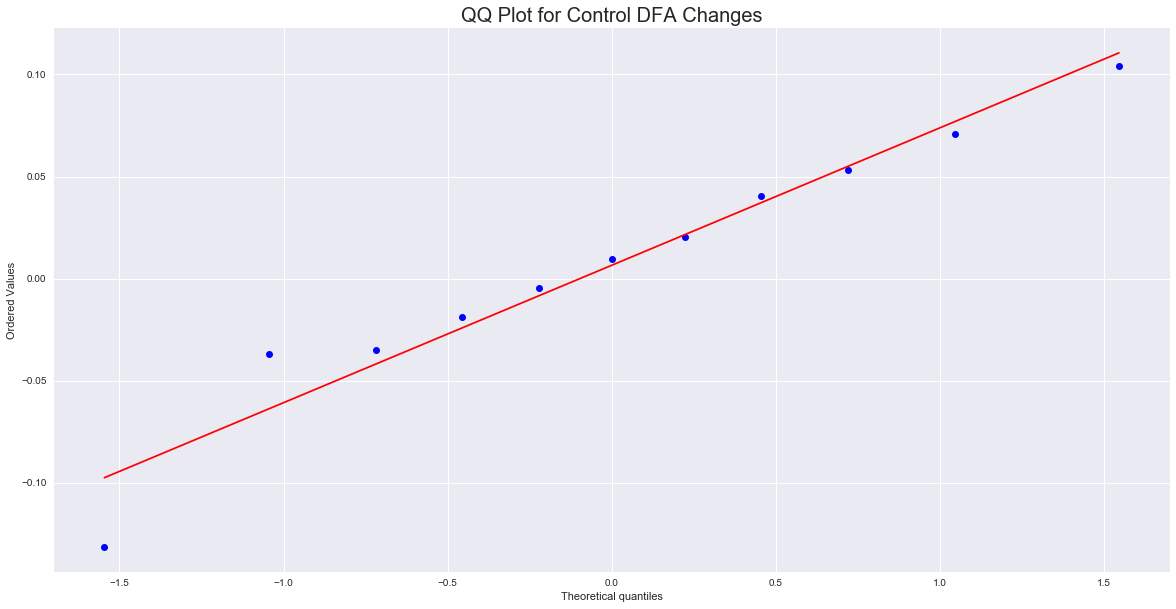

In [60]:
stats.probplot(control, dist='norm', plot=plt)
plt.title('QQ Plot for Control DFA Changes', fontsize=20)
plt.show()

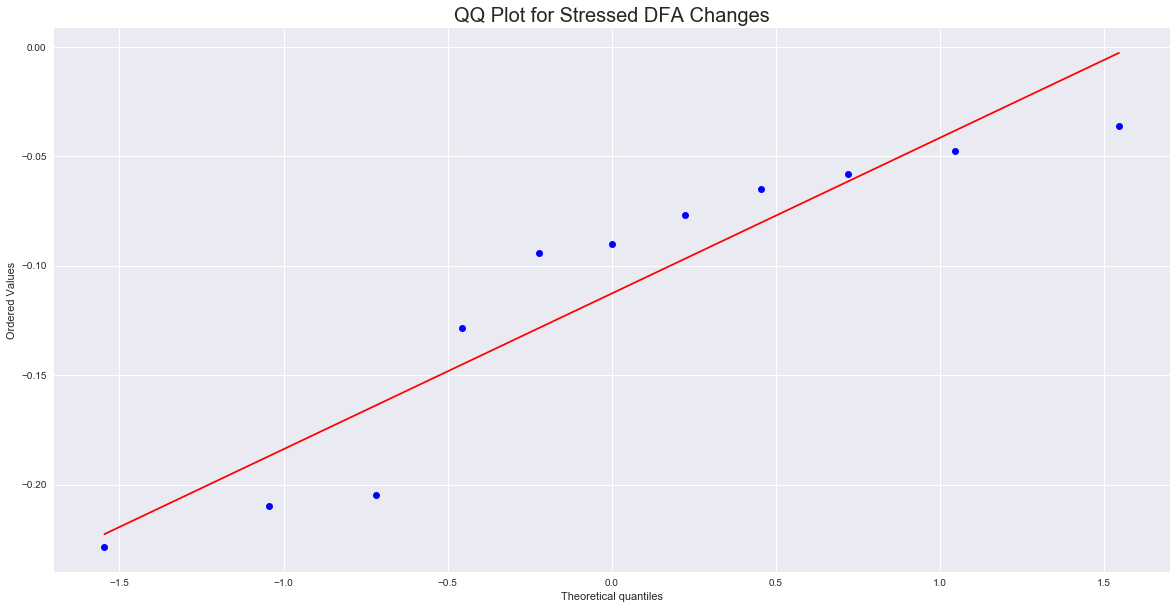

In [61]:
stats.probplot(stressed, dist='norm', plot=plt)
plt.title('QQ Plot for Stressed DFA Changes', fontsize=20)
plt.show()

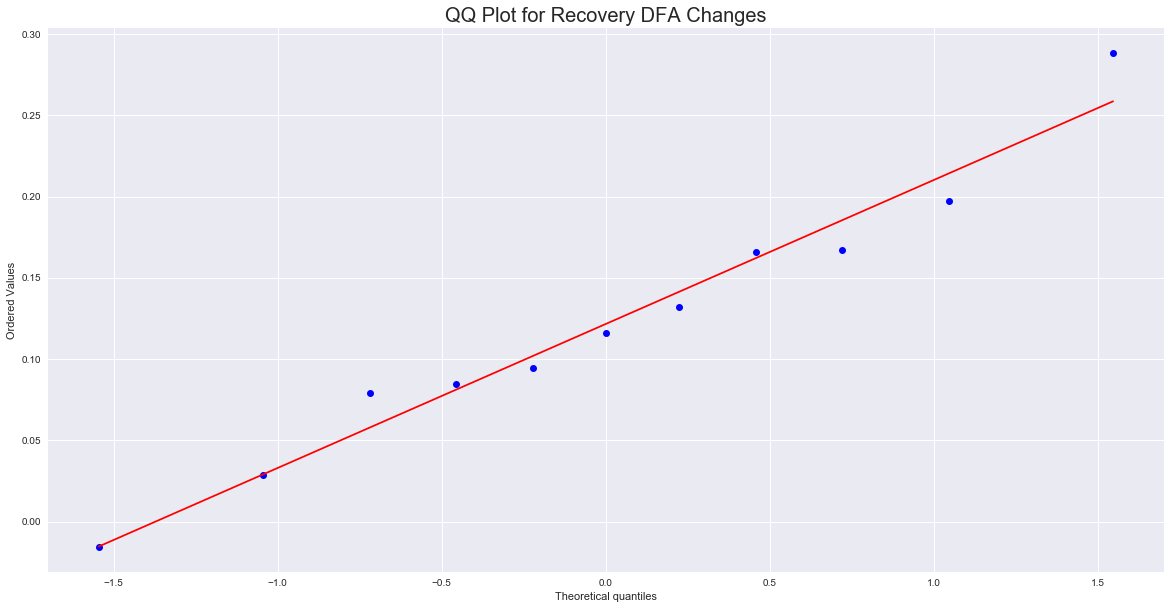

In [62]:
stats.probplot(recovery, dist='norm', plot=plt)
plt.title('QQ Plot for Recovery DFA Changes', fontsize=20)
plt.show()

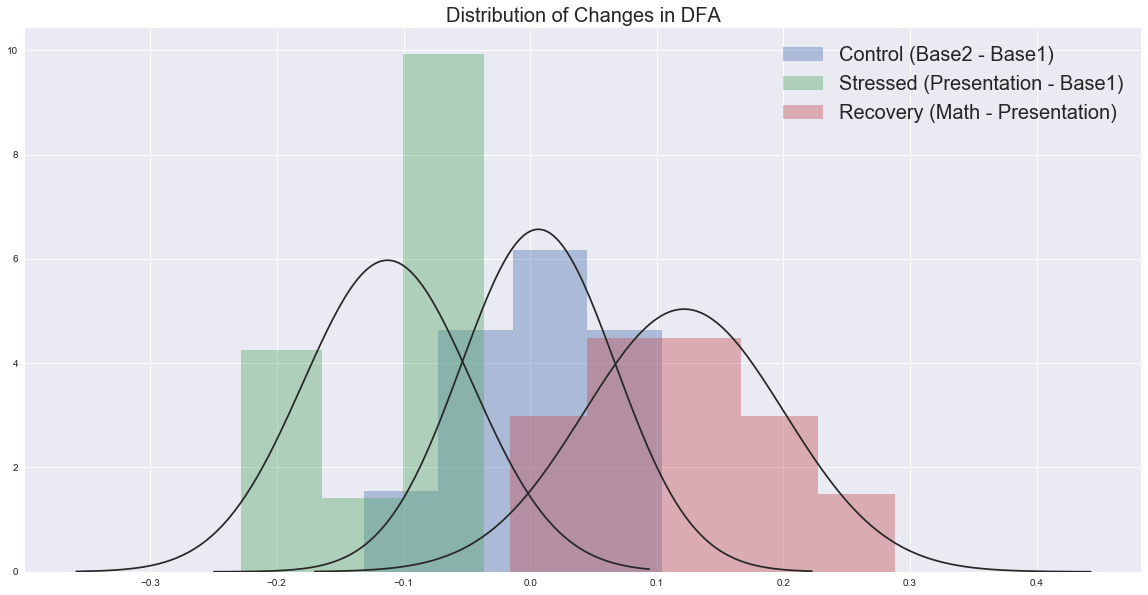

In [166]:

sns.set(rc={"figure.figsize": (20, 10), "legend.fontsize":20})
sns.distplot(control,kde=False, fit=stats.norm, label='Control (Base2 - Base1)')
sns.distplot(stressed,kde=False, fit=stats.norm, label = 'Stressed (Presentation - Base1)')
sns.distplot(recovery,kde=False, fit=stats.norm, label='Recovery (Math - Presentation)')
plt.legend()
plt.title("Distribution of Changes in DFA", fontsize=20)
plt.savefig('dfa_changes.png')

plt.show()

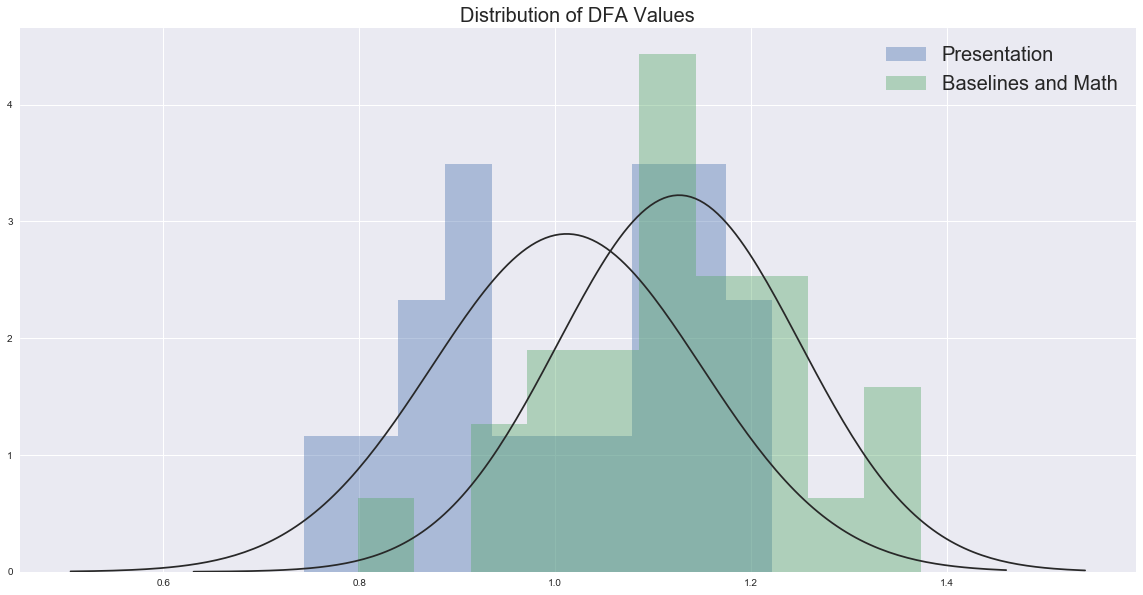

In [64]:
b1s = list(df[df.id.str.contains('b1')].dfa)
b2s = list(df[df.id.str.contains('b2')].dfa)
s1s = list(df[df.id.str.contains('s1')].dfa)
s2s = list(df[df.id.str.contains('s2')].dfa)

unstressed = b1s+b2s+s2s


sns.set(rc={"figure.figsize": (20, 10), "legend.fontsize":20})
#sns.distplot(b1s,kde=False, bins = 10, fit=stats.norm, label='b1')
#sns.distplot(b2s,kde=False, bins = 10,fit=stats.norm, label = 'b2')
sns.distplot(s1s,kde=False, bins = 10,fit=stats.norm, label='Presentation')
sns.distplot(unstressed,kde=False, bins = 10,fit=stats.norm, label='Baselines and Math')
plt.legend()
plt.title("Distribution of DFA Values", fontsize=20)
plt.show()

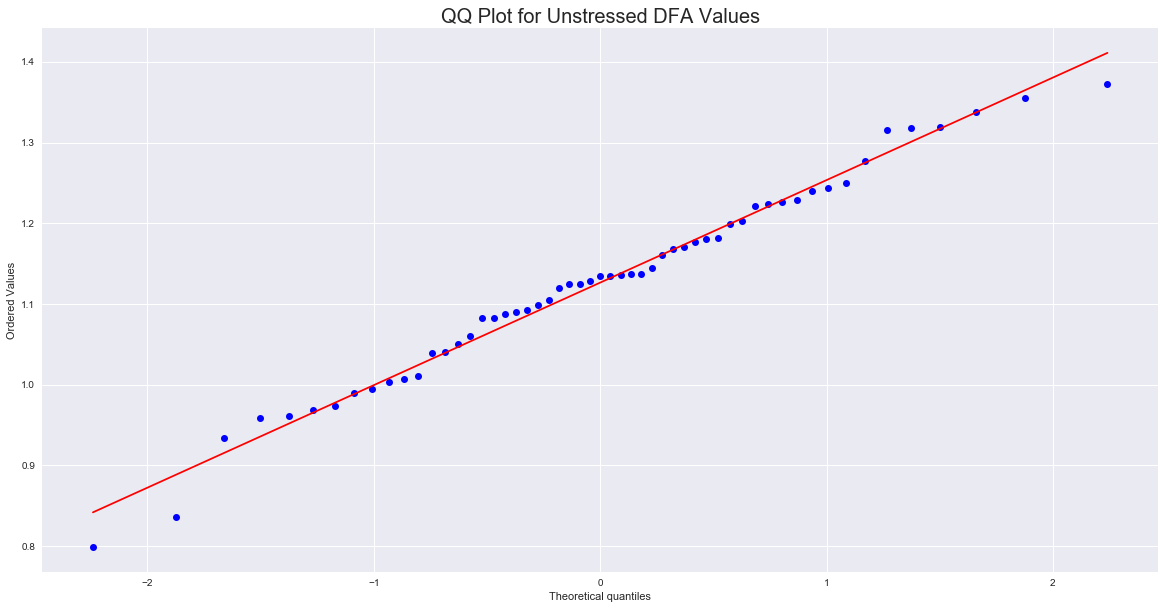

In [65]:
stats.probplot(unstressed, dist='norm', plot=plt)
plt.title('QQ Plot for Unstressed DFA Values', fontsize=20)
plt.show()

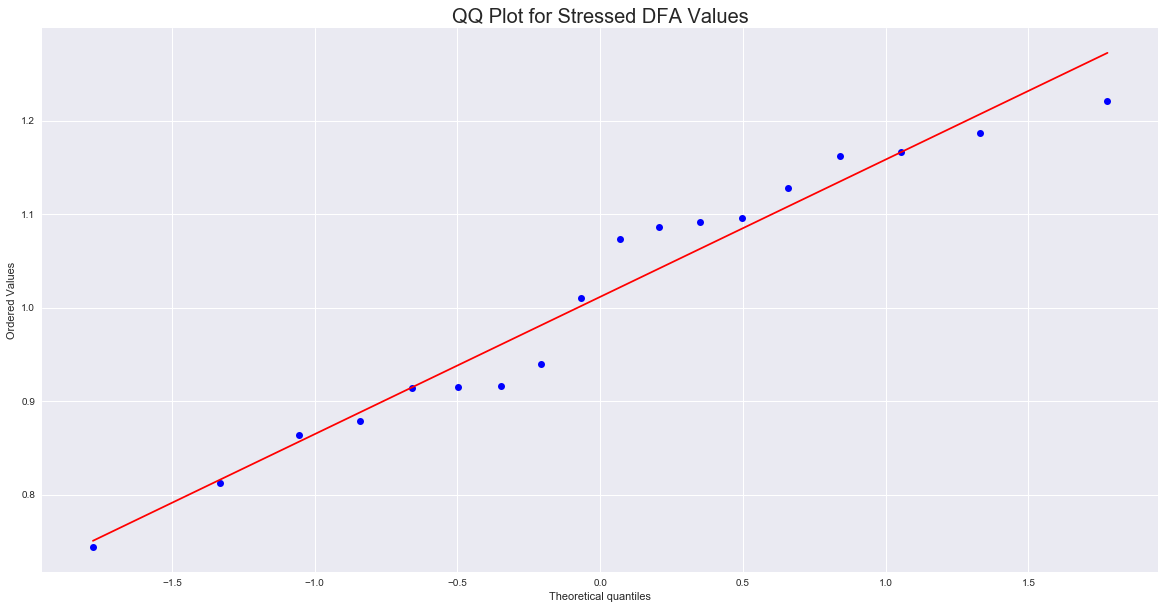

In [66]:
stats.probplot(s1s, dist='norm', plot=plt)
plt.title('QQ Plot for Stressed DFA Values', fontsize=20)
plt.show()

In [67]:
# Entropy Differences

# need 
# b2-b1
# s1-b1
# s2-s1

# Get b2-b1
control_ent = []
for i in range(len(ids))[::4]:
##    print(ids[i+1])
    before = float(df[df.id == ids[i]].ent)
    after = df.loc[df.id == ids[i+1]].ent
##    print(before)
##    print(after)
    after = float(after)    
##    print(after-before)
    control_ent.append(after-before)

control_ent = np.array(control_ent)

print(control_ent)



[ 0.02273758 -0.12364483 -0.15598521 -0.08714049 -0.003421    0.0109934
 -0.00968441  0.0427724  -0.02764036 -0.0160982   0.01751273]


In [68]:
# Get s1-b1

stressed_ent = []

for i in range(len(ids))[::4]:
    
##    print(ids[i])
##    print(ids[i+2])  
    before = float(df[df.id == ids[i]].ent)
    after = df.loc[df.id == ids[i+2]].ent
    after = float(after)    
    stressed_ent.append(after-before)

stressed_ent = np.array(stressed_ent)

print(stressed_ent)

[ 0.13755486 -0.20069464 -0.15117121 -0.08454758 -0.06871962 -0.0170037
  0.05138383 -0.0135421   0.0210037   0.19315715  0.02617704]


In [69]:
# Get s2-s1
recovery_ent = []

for i in range(len(ids))[::4]:
    
##    print(ids[i])
##    print(ids[i+2])  
    before = float(df[df.id == ids[i+2]].ent)
    after = df.loc[df.id == ids[i+3]].ent
    after = float(after)    
    recovery_ent.append(after-before)

recovery_ent = np.array(recovery_ent)

print(recovery_ent)

[-0.15936151  0.69887597  0.06615264 -0.0525886   0.014786   -0.00810278
 -0.06302264  0.05790508 -0.03062175 -0.08071844 -0.00330389]


In [70]:
print('Control:')
print(str(stats.describe(control_ent)) + '\n')
print('Stressed:')
print(str(stats.describe(stressed_ent)) + '\n')
print('Recovery:')
print(str(stats.describe(recovery_ent)) + '\n')

Control:
DescribeResult(nobs=11, minmax=(-0.15598521288368342, 0.04277239715588943), mean=-0.029963492084905351, variance=0.0041239636262388789, skewness=-0.9005188319147228, kurtosis=-0.5148351888897409)

Stressed:
DescribeResult(nobs=11, minmax=(-0.20069464465506689, 0.19315715369891825), mean=-0.0096729343133101636, variance=0.01344427631617586, skewness=0.09479415816606451, kurtosis=-0.5932380780893318)

Recovery:
DescribeResult(nobs=11, minmax=(-0.15936151265775833, 0.69887597131200496), mean=0.040000007662304403, variance=0.051843864685714461, skewness=2.4337609434010905, kurtosis=4.795189084162285)



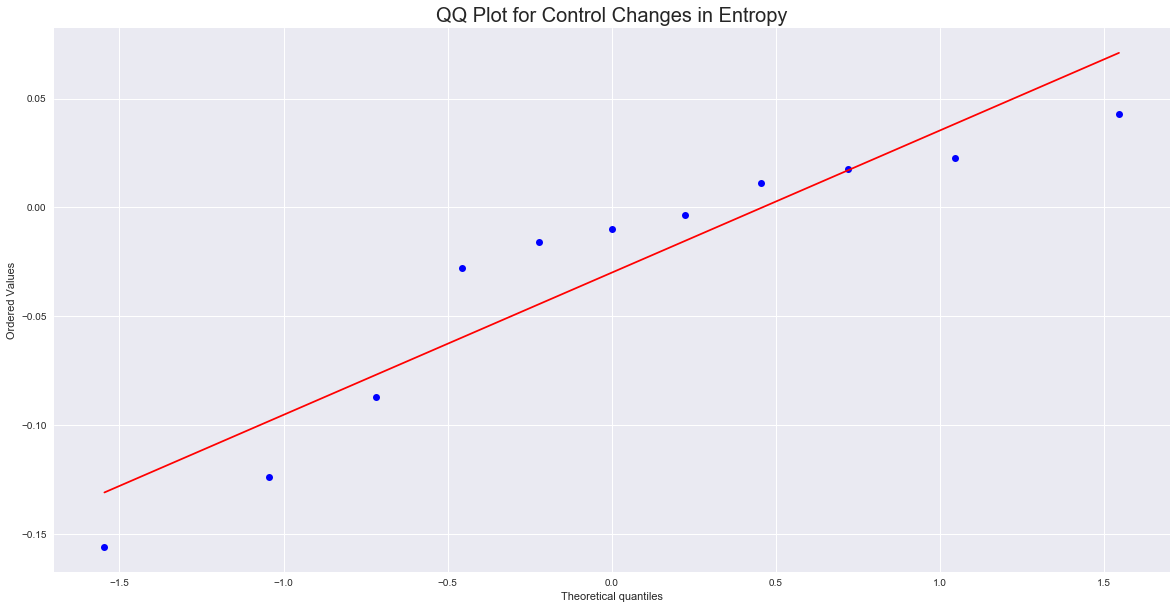

In [71]:
stats.probplot(control_ent, dist='norm', plot=plt)
plt.title('QQ Plot for Control Changes in Entropy', fontsize=20)
plt.show()

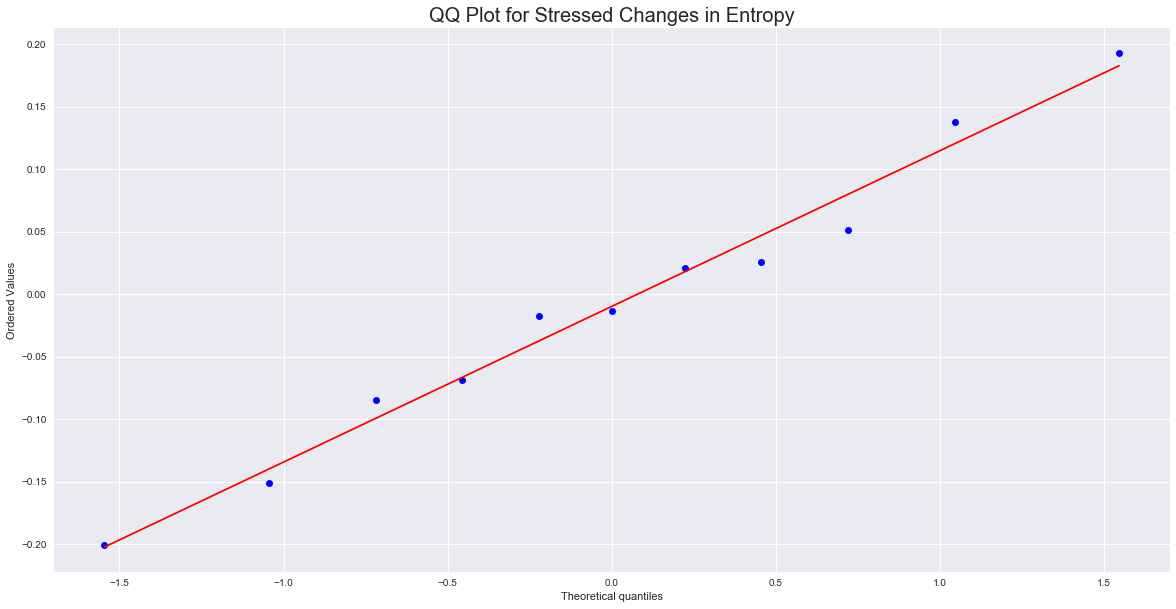

In [72]:
stats.probplot(stressed_ent, dist='norm', plot=plt)
plt.title('QQ Plot for Stressed Changes in Entropy', fontsize=20)
plt.show()

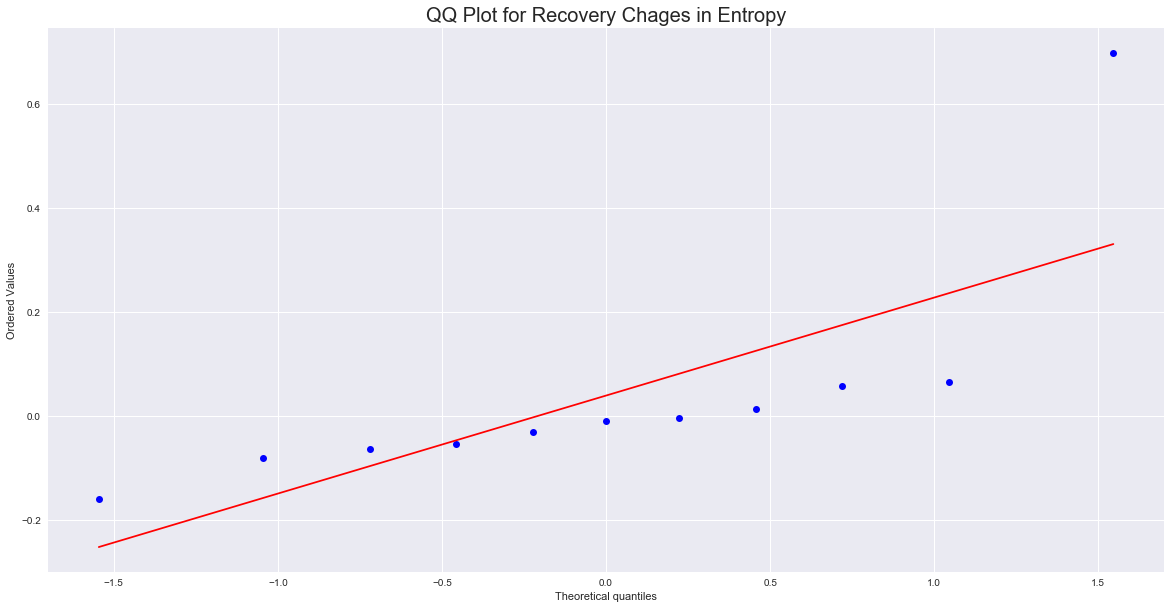

In [73]:
stats.probplot(recovery_ent, dist='norm', plot=plt)
plt.title('QQ Plot for Recovery Chages in Entropy', fontsize=20)
plt.show()

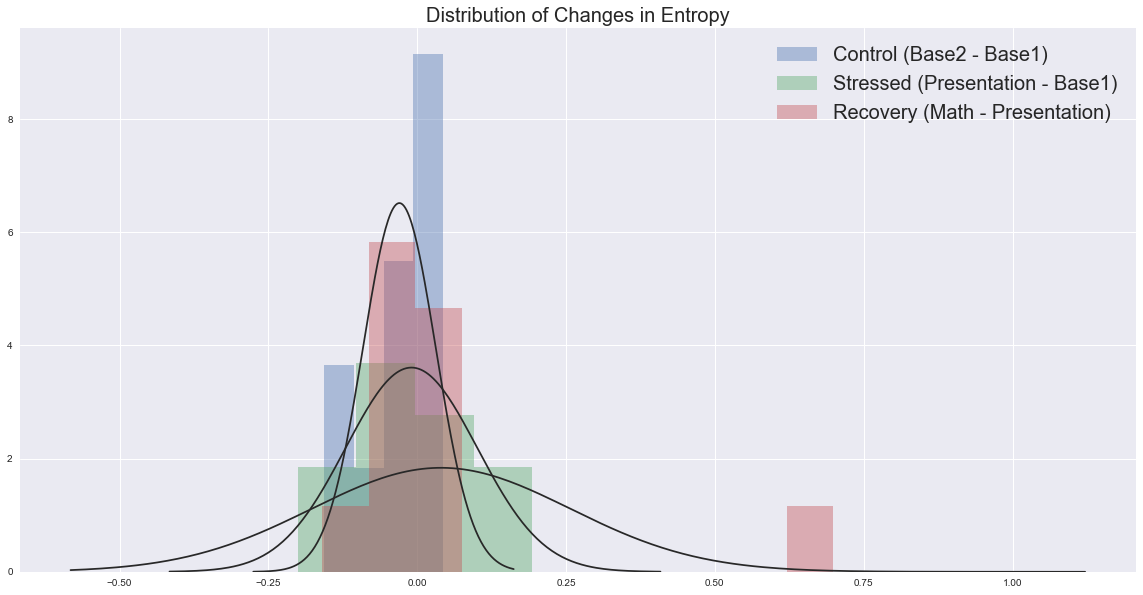

In [165]:

sns.set(rc={"figure.figsize": (20, 10), "legend.fontsize":20})
sns.distplot(control_ent,kde=False, fit=stats.norm, label='Control (Base2 - Base1)')
sns.distplot(stressed_ent,kde=False, fit=stats.norm, label = 'Stressed (Presentation - Base1)')
sns.distplot(recovery_ent,kde=False, fit=stats.norm, label='Recovery (Math - Presentation)')
plt.legend()
plt.title("Distribution of Changes in Entropy", fontsize=20)
plt.savefig('entropy_changes.png')

plt.show()

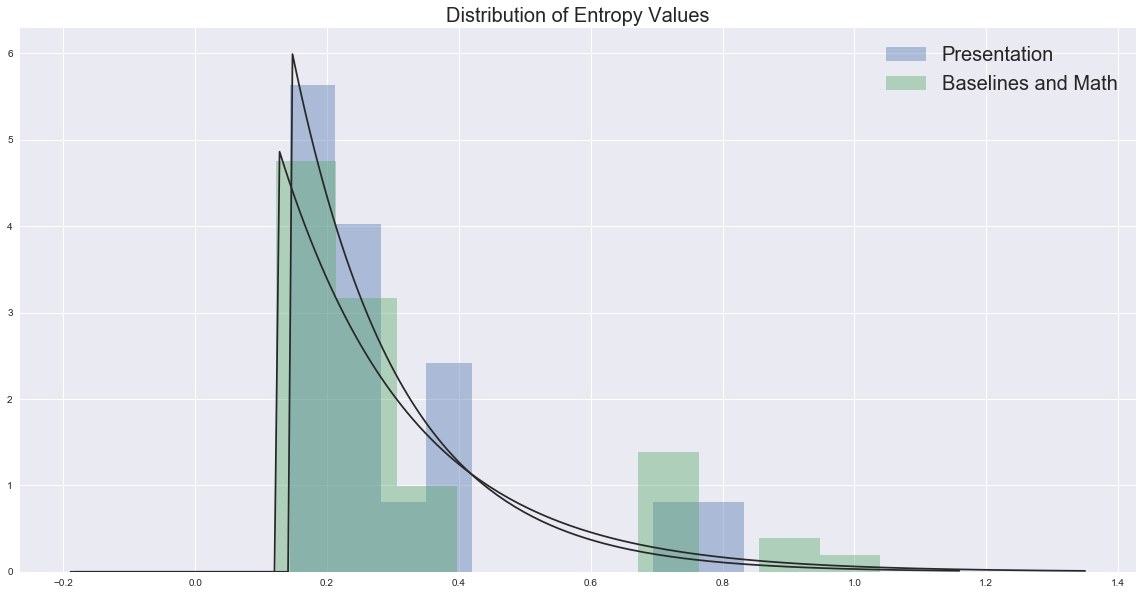

In [75]:


b1s_ent = list(df[df.id.str.contains('b1')].ent)
b2s_ent = list(df[df.id.str.contains('b2')].ent)
s1s_ent = list(df[df.id.str.contains('s1')].ent)
s2s_ent = list(df[df.id.str.contains('s2')].ent)

unstressed_ent = b1s_ent+b2s_ent+s2s_ent


sns.set(rc={"figure.figsize": (20, 10), "legend.fontsize":20})
#sns.distplot(b1s,kde=False, bins = 10, fit=stats.norm, label='b1')
#sns.distplot(b2s,kde=False, bins = 10,fit=stats.norm, label = 'b2')
sns.distplot(s1s_ent,kde=False, bins = 10,fit=stats.expon, label='Presentation')
sns.distplot(unstressed_ent,kde=False, bins = 10,fit=stats.expon, label='Baselines and Math')
plt.legend()
plt.title("Distribution of Entropy Values", fontsize=20)
plt.show()

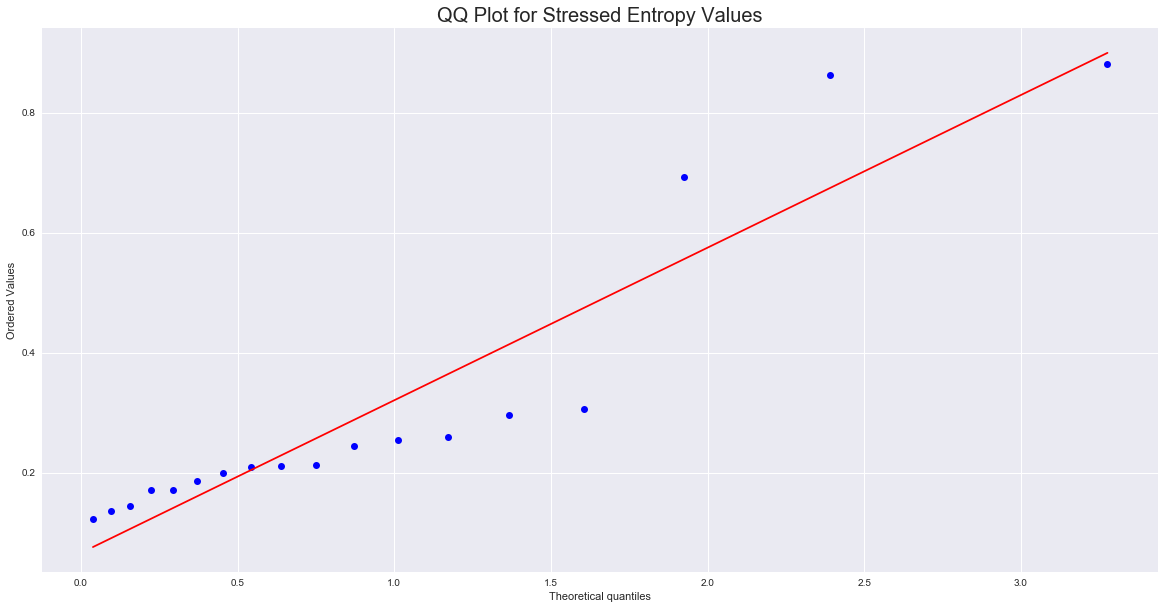

In [76]:
stats.probplot(s2s_ent, dist='expon', plot=plt)
plt.title('QQ Plot for Stressed Entropy Values', fontsize=20)
plt.show()

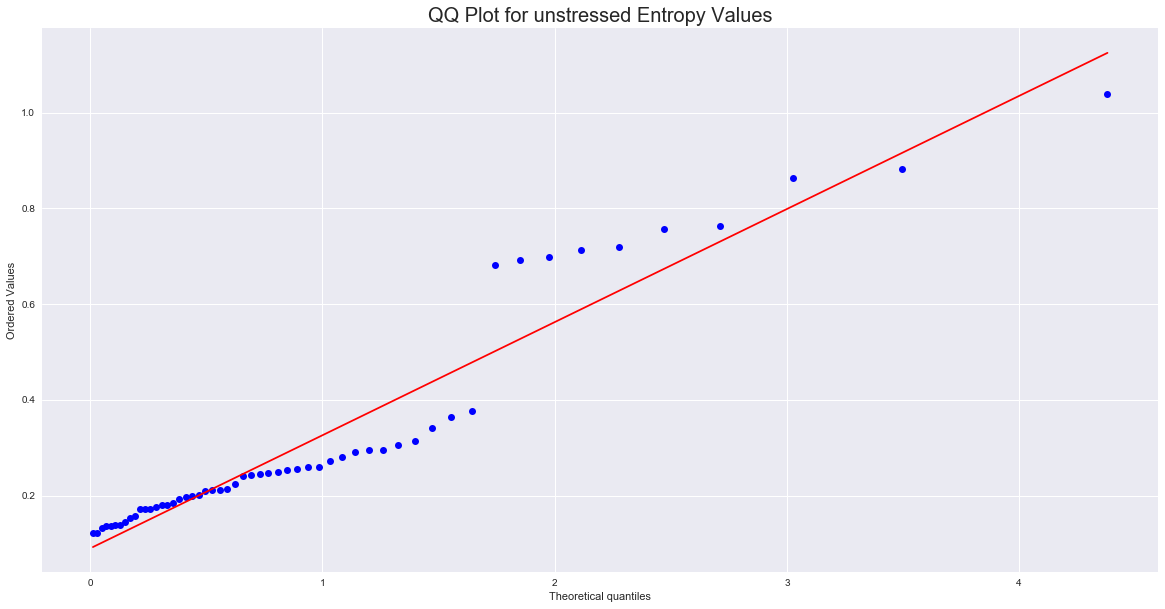

In [77]:
stats.probplot(unstressed_ent, dist='expon', plot=plt)
plt.title('QQ Plot for unstressed Entropy Values', fontsize=20)
plt.show()

In [78]:
ent_of_interest = df.loc[df.ent>0.5]

In [79]:
ent_of_interest

,id,state,data,datetime,hr,stdnn,dfa,ent
0,1b1,Base,"333,335,335,337,337,339,340,340,342,343,343,34...",February28030415,0.000000,0.00000,1.276592,0.682245
14,4s2,Stress,"332,332,331,331,331,331,330,329,329,330,329,32...",February28035918,84.410646,39.50904,1.082714,0.863123
16,6b2,Base,"333,333,333,334,333,334,334,334,334,333,333,33...",February28040313,105.276839,43.71450,0.934474,1.038825
29,10b1,Base,"346,346,346,346,345,344,344,343,343,344,343,34...",February28050126,0.000000,0.00000,1.134169,0.762973
30,10b2,Base,"339,339,338,339,338,338,338,338,337,337,337,33...",February28050202,0.000000,0.00000,1.104732,0.720300
32,10s1,Stress,"331,332,332,332,332,332,332,332,331,332,331,33...",February28051528,0.000000,0.00000,0.812308,0.832928
33,10s2,Stress,"336,335,336,336,338,337,338,338,339,339,339,33...",February28052039,0.000000,0.00000,0.989226,0.881650
61,21b1,Base,"328,328,328,329,328,328,329,330,330,331,330,33...",February28080042,0.000000,0.00000,1.135926,0.757628
62,21b2,Base,"336,336,336,336,336,336,337,338,337,338,337,33...",February28080124,0.000000,0.00000,1.144475,0.697571
64,22b2,Base,"341,340,340,339,339,339,338,337,337,337,336,33...",February28080256,0.000000,0.00000,0.958144,0.712821


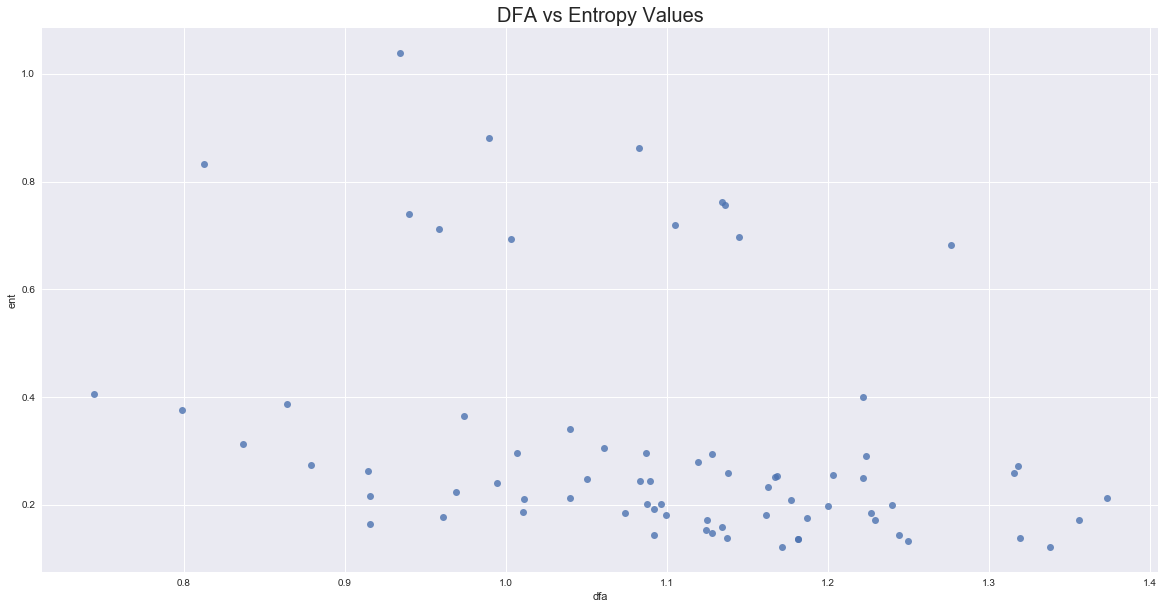

In [80]:
sns.regplot(x=df.dfa,y=df.ent, fit_reg=False)
plt.title('DFA vs Entropy Values', fontsize=20)
plt.show()

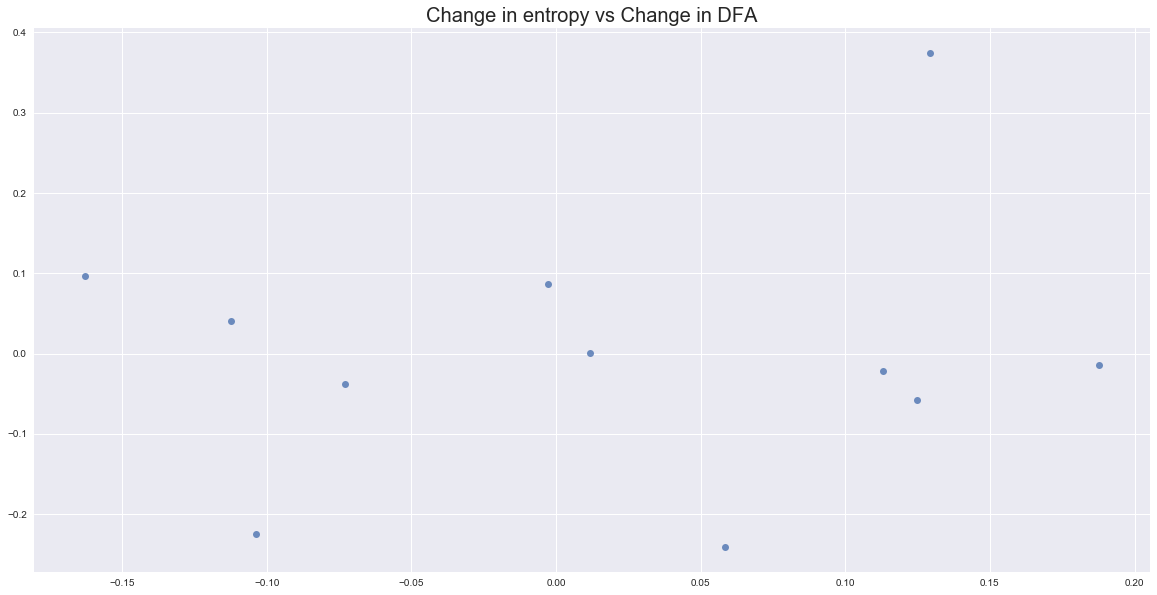

In [81]:
sns.regplot(x=control+stressed+recovery, y=control_ent+stressed_ent+recovery_ent, fit_reg=False)
plt.title('Change in entropy vs Change in DFA', fontsize=20)
plt.show()

In [82]:
print("Entroy sucks")

Entroy sucks


In [83]:
# Remove entries without HR

nums = [x for x in range(24)]
rem = [0, 5, 3, 13, 15, 16, 17, 19, 21, 22, 10, 6,1]
nums = [x for x in nums if not x in rem]
# remove 5, 15, 16, 17
labels = ['b1', 'b2', 's1', 's2']
ids = [str(n) + lab for n in nums for lab in labels]
print(ids)

['2b1', '2b2', '2s1', '2s2', '4b1', '4b2', '4s1', '4s2', '7b1', '7b2', '7s1', '7s2', '8b1', '8b2', '8s1', '8s2', '9b1', '9b2', '9s1', '9s2', '11b1', '11b2', '11s1', '11s2', '12b1', '12b2', '12s1', '12s2', '14b1', '14b2', '14s1', '14s2', '18b1', '18b2', '18s1', '18s2', '20b1', '20b2', '20s1', '20s2', '23b1', '23b2', '23s1', '23s2']


In [84]:
# HR Differences



# need 
# b2-b1
# s1-b1
# s2-s1

# Get b2-b1
control_hr = []
for i in range(len(ids))[::4]:
##    print(ids[i+1])
    before = float(df[df.id == ids[i]].hr)
    after = df.loc[df.id == ids[i+1]].hr
##    print(before)
##    print(after)
    after = float(after)    
##    print(after-before)
    control_hr.append(after-before)

control_hr = np.array(control_hr)

print(control_hr)



[-10.63319786  -2.1660489   -1.29103173  -2.17792983  -5.60013265
  -8.27305393  -5.74313065  -2.00464852  -1.13420141   6.5297484
   0.24412915]


In [85]:
# Get s1-b1

stressed_hr = []

for i in range(len(ids))[::4]:
    
##    print(ids[i])
##    print(ids[i+2])  
    before = float(df[df.id == ids[i]].hr)
    after = df.loc[df.id == ids[i+2]].hr
    after = float(after)    
    stressed_hr.append(after-before)

stressed_hr = np.array(stressed_hr)

print(stressed_hr)

[  5.87447071   9.9529283    2.78484702  17.92225954  18.2739916
  33.9949653   17.51140824  18.29192109  20.38622539  41.15964556
  22.20562058]


In [86]:
# Get s2-s1
recovery_hr = []

for i in range(len(ids))[::4]:
    
##    print(ids[i])
##    print(ids[i+2])  
    before = float(df[df.id == ids[i+2]].hr)
    after = df.loc[df.id == ids[i+3]].hr
    after = float(after)    
    recovery_hr.append(after-before)

recovery_hr = np.array(recovery_hr)

print(recovery_hr)

[-18.33517571 -20.83830787 -29.56578993  -1.83953214 -25.29125827
 -38.59475843 -21.6660214  -17.90378269 -15.48256773 -33.46796015
 -17.00781562]


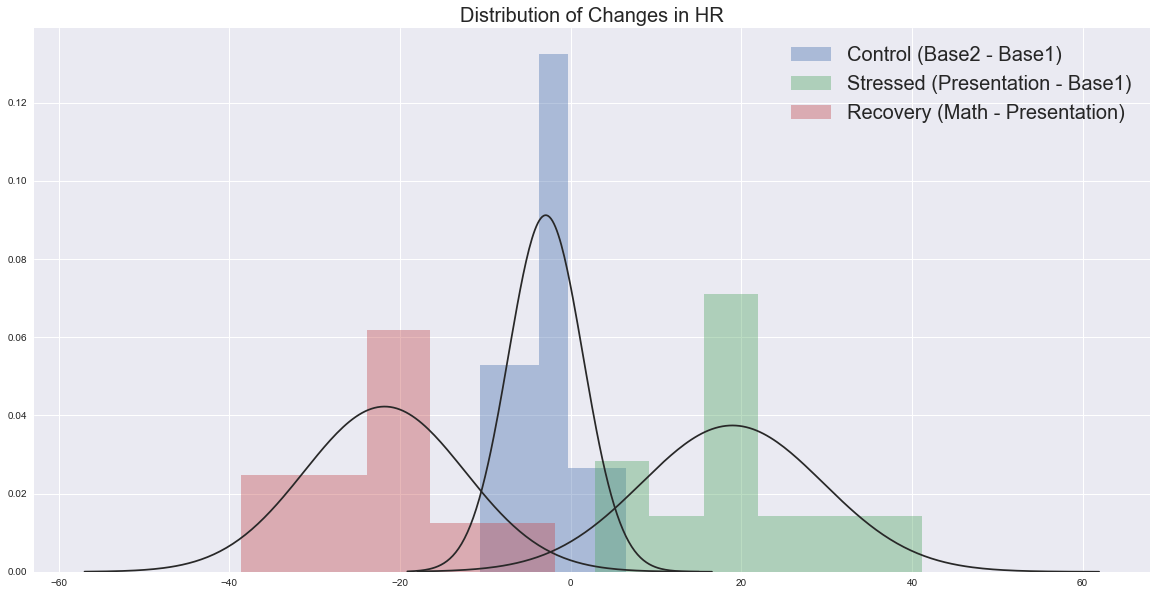

In [164]:

sns.set(rc={"figure.figsize": (20, 10), "legend.fontsize":20})
sns.distplot(control_hr,kde=False, fit=stats.norm, label='Control (Base2 - Base1)')
sns.distplot(stressed_hr,kde=False, fit=stats.norm, label = 'Stressed (Presentation - Base1)')
sns.distplot(recovery_hr,kde=False, fit=stats.norm, label='Recovery (Math - Presentation)')
plt.legend()
plt.title("Distribution of Changes in HR", fontsize=20)
plt.savefig('hr_changes.png')

plt.show()

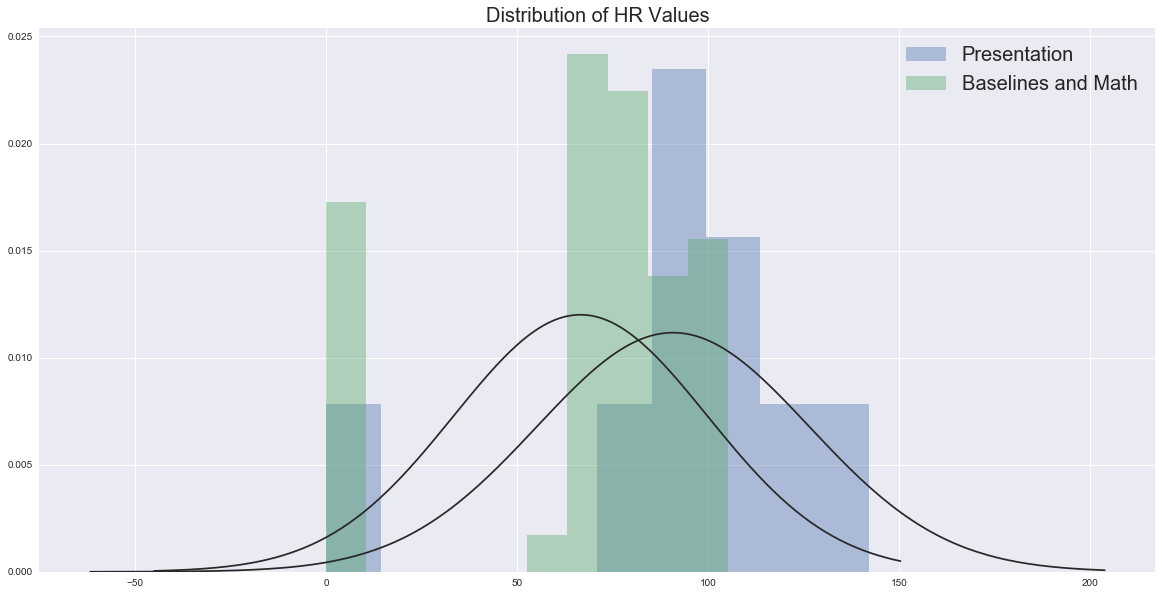

In [88]:
b1s_hr = list(df[df.id.str.contains('b1')].hr)
b2s_hr = list(df[df.id.str.contains('b2')].hr)
s1s_hr = list(df[df.id.str.contains('s1')].hr)
s2s_hr = list(df[df.id.str.contains('s2')].hr)

unstressed_hr = b1s_hr+b2s_hr+s2s_hr


sns.set(rc={"figure.figsize": (20, 10), "legend.fontsize":20})
#sns.distplot(b1s,kde=False, bins = 10, fit=stats.norm, label='b1')
#sns.distplot(b2s,kde=False, bins = 10,fit=stats.norm, label = 'b2')
sns.distplot(s1s_hr,kde=False, bins = 10,fit=stats.norm, label='Presentation')
sns.distplot(unstressed_hr,kde=False, bins = 10,fit=stats.norm, label='Baselines and Math')
plt.legend()
plt.title("Distribution of HR Values", fontsize=20)
plt.show()

In [89]:
# STDNN Differences



# need 
# b2-b1
# s1-b1
# s2-s1

# Get b2-b1
control_std = []
for i in range(len(ids))[::4]:
##    print(ids[i+1])
    before = float(df[df.id == ids[i]].stdnn)
    after = df.loc[df.id == ids[i+1]].stdnn
##    print(before)
##    print(after)
    after = float(after)    
##    print(after-before)
    control_std.append(after-before)

control_std = np.array(control_std)

print(control_std)



[-34.43922488  29.46513896  -2.99496038 -13.99581308 -29.1205998
 -21.54394821   4.0331078   13.59827004  -7.99947034   6.1321902
  10.05889427]


In [90]:
# Get s1-b1

stressed_std = []

for i in range(len(ids))[::4]:
    
##    print(ids[i])
##    print(ids[i+2])  
    before = float(df[df.id == ids[i]].stdnn)
    after = df.loc[df.id == ids[i+2]].stdnn
    after = float(after)    
    stressed_std.append(after-before)

stressed_std = np.array(stressed_std)

print(stressed_std)

[-58.36884642   8.74313795  -0.610259    -8.92068049 -20.30386348
 -54.1370061  -10.04244546 -24.60222463  16.41272517 -10.99969552
  15.96396291]


In [91]:
# Get s2-s1
recovery_std = []

for i in range(len(ids))[::4]:
    
##    print(ids[i])
##    print(ids[i+2])  
    before = float(df[df.id == ids[i+2]].stdnn)
    after = df.loc[df.id == ids[i+3]].stdnn
    after = float(after)    
    recovery_std.append(after-before)

recovery_std = np.array(recovery_std)

print(recovery_std)

[  2.25278636  -8.17898754  62.41187179 -32.37034836   3.08651989
  53.00658038  11.52199641  39.45631821 -13.85916851   2.64446116
   8.16300039]


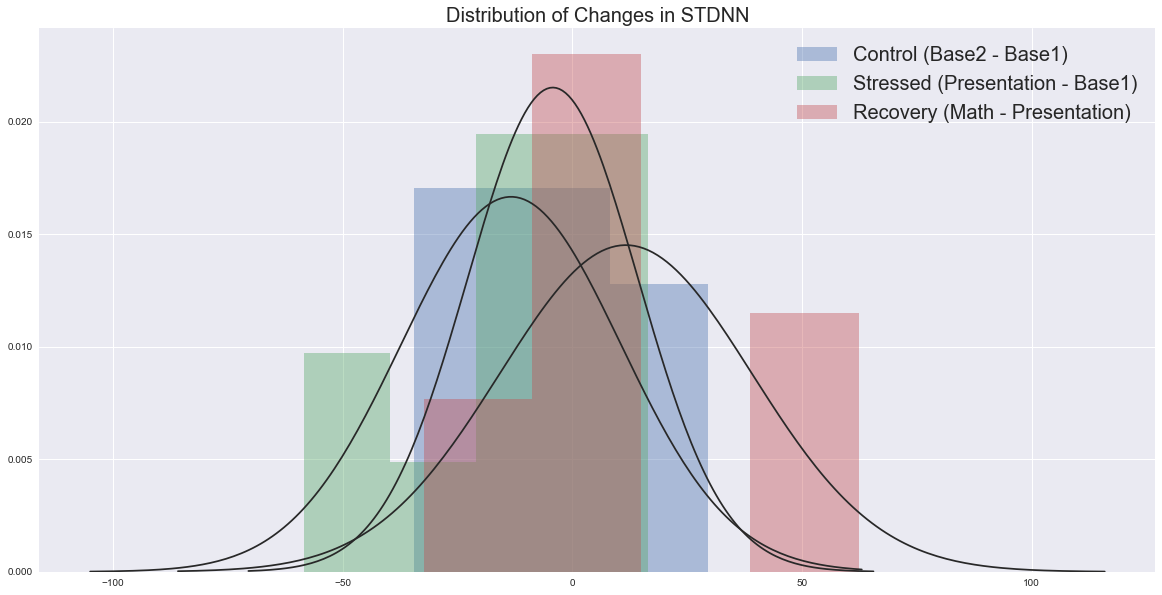

In [163]:

sns.set(rc={"figure.figsize": (20, 10), "legend.fontsize":20})
sns.distplot(control_std,kde=False, fit=stats.norm, label='Control (Base2 - Base1)')
sns.distplot(stressed_std,kde=False, fit=stats.norm, label = 'Stressed (Presentation - Base1)')
sns.distplot(recovery_std,kde=False, fit=stats.norm, label='Recovery (Math - Presentation)')
plt.legend()
plt.title("Distribution of Changes in STDNN", fontsize=20)
plt.savefig('stdnn_changes.png')
plt.show()

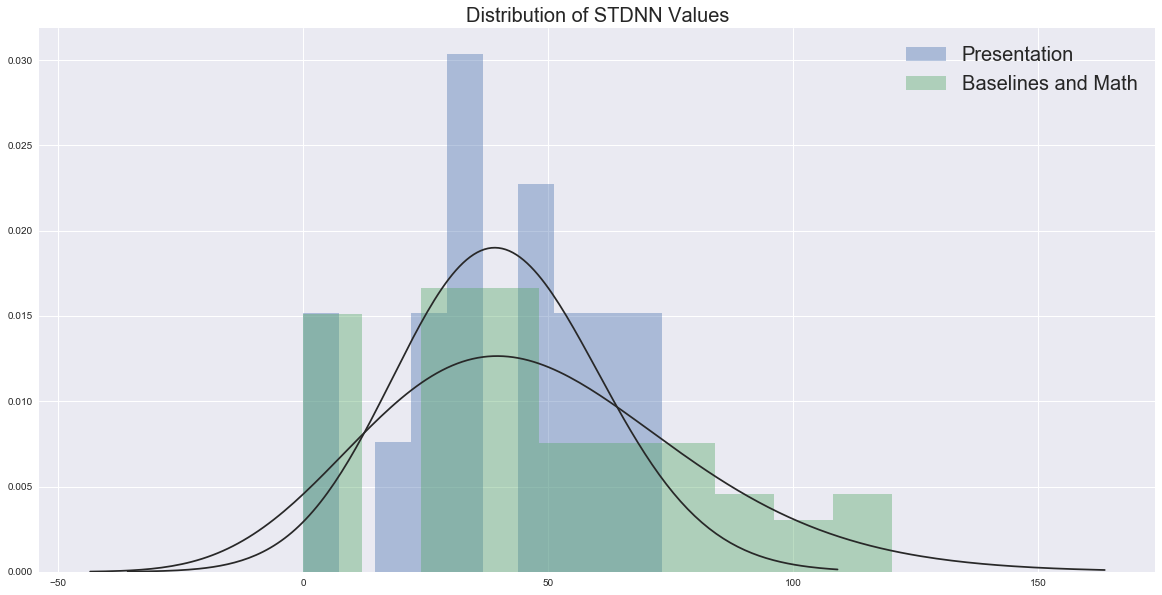

In [93]:
b1s_std = list(df[df.id.str.contains('b1')].stdnn)
b2s_std = list(df[df.id.str.contains('b2')].stdnn)
s1s_std = list(df[df.id.str.contains('s1')].stdnn)
s2s_std = list(df[df.id.str.contains('s2')].stdnn)

unstressed_std = b1s_std+b2s_std+s2s_std


sns.set(rc={"figure.figsize": (20, 10), "legend.fontsize":20})
#sns.distplot(b1s,kde=False, bins = 10, fit=stats.norm, label='b1')
#sns.distplot(b2s,kde=False, bins = 10,fit=stats.norm, label = 'b2')
sns.distplot(s1s_std,kde=False, bins = 10,fit=stats.gamma, label='Presentation')
sns.distplot(unstressed_std,kde=False, bins = 10,fit=stats.gamma, label='Baselines and Math')
plt.legend()
plt.title("Distribution of STDNN Values", fontsize=20)
plt.show()

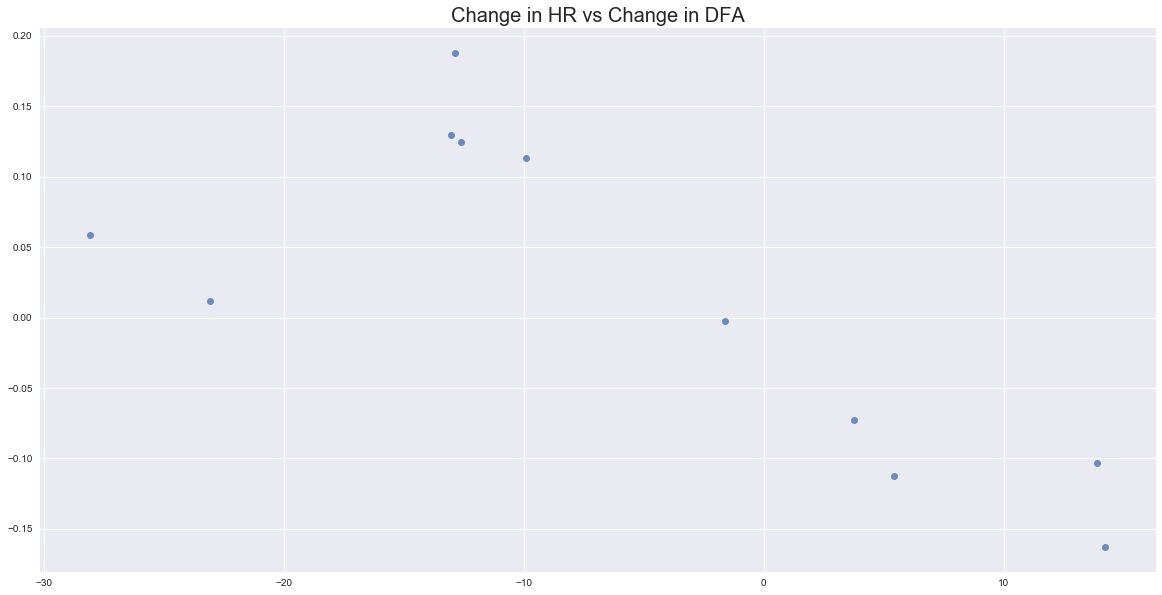

In [97]:
sns.regplot(x=control_hr+stressed_hr+recovery_hr, y=control+stressed+recovery, fit_reg=False)
plt.title('Change in HR vs Change in DFA', fontsize=20)
plt.show()

In [111]:
foox=[]
foox.append(float(df.hr.loc[df.id=='4b1']))
foox.append(float(df.hr.loc[df.id=='4s1']))
foox = np.array(foox)
print(foox)

[  95.29602595  105.24895426]


In [110]:
fooy=[]
fooy.append(float(df.dfa.loc[df.id=='4b1']))
fooy.append(float(df.dfa.loc[df.id=='4s1']))
fooy=np.array(fooy)
print(fooy)



[ 0.97374397  0.91580825]


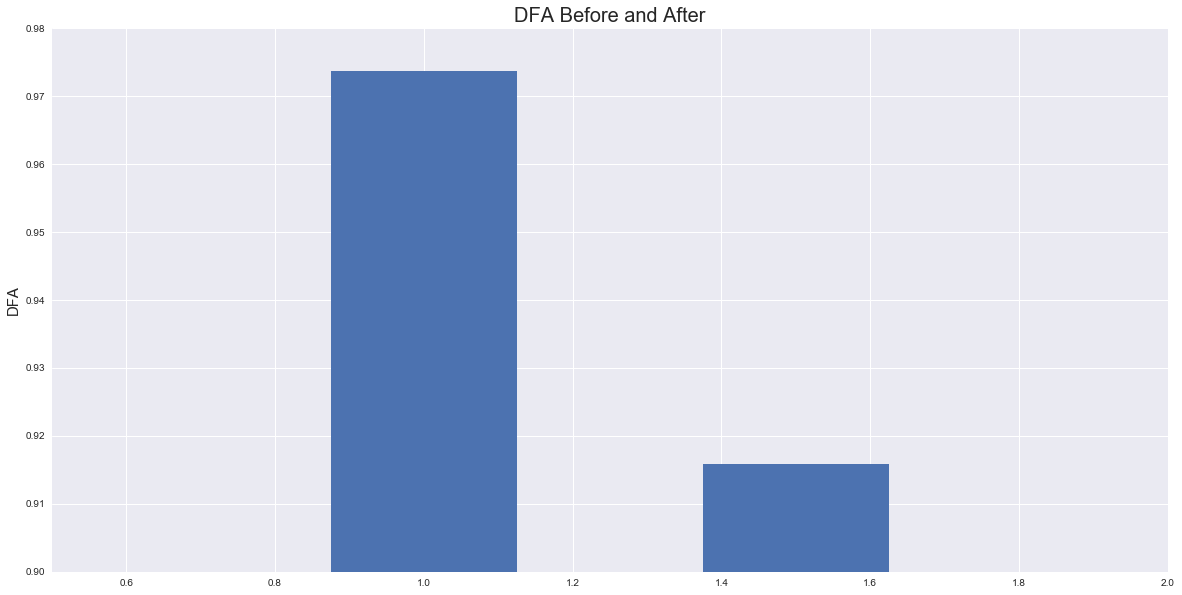

In [158]:
plt.bar([1,1.5], fooy, 0.25)
plt.xlim(.5,2)
plt.ylim(.9,.98)
plt.ylabel('DFA', fontsize=15)
plt.title('DFA Before and After',fontsize=20)
plt.savefig('indiv_dfa.png')

plt.show()


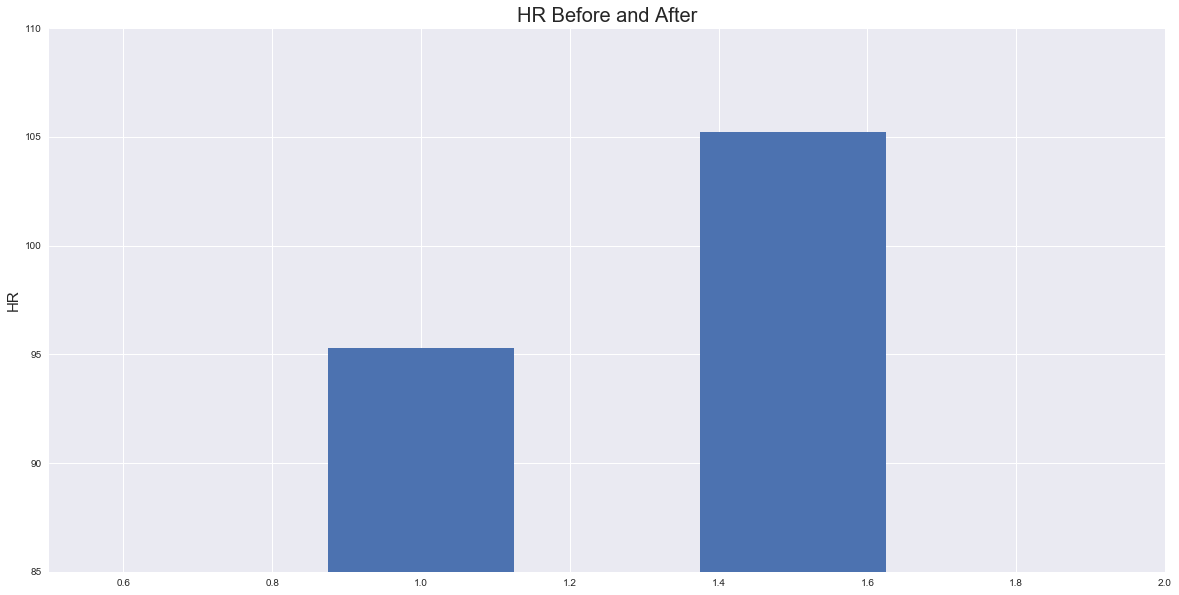

In [157]:
plt.bar([1,1.5], foox, 0.25)
plt.xlim(.5,2)
plt.ylim(85,110)
plt.ylabel('HR', fontsize=15)
plt.title('HR Before and After',fontsize=20)
plt.savefig('indiv_hr.png')
plt.show()
